# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Syaiful A A Kusing]
- **Email:** [m486b4ky4256@bangkit.academy]
- **ID Dicoding:** [syaiful_kusing]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap penyewaan sepeda, dan bagaimana cara memaksimalkan pendapatan di setiap musim?
- Bagaimana perilaku penyewaan pengguna kasual dibandingkan dengan pengguna terdaftar, dan bagaimana cara mengonversi pengguna kasual menjadi pelanggan tetap?

## Import Semua Packages/Library yang Digunakan

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

url : https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view?usp=sharing

In [178]:
import pandas as pd

#from google.colab import drive
#drive.mount('/content/drive')

#file_path1 = '/content/drive/My Drive/Colab Notebooks/bike_sharing_dataset/day.csv'
#file_path2 = '/content/drive/My Drive/Colab Notebooks/bike_sharing_dataset/hour.csv'
#day_df = pd.read_csv(file_path1)
#hour_df = pd.read_csv(file_path2)

day_df = pd.read_csv('Bike-sharing-dataset/day.csv')
hour_df = pd.read_csv('Bike-sharing-dataset/hour.csv')

day_df.head()
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [120]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [121]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [122]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- (day_df) memiliki 17.379 baris, yang tampaknya merepresentasikan data per jam karena ada kolom hr (jam)
- Dataset kedua memiliki 731 baris, kemungkinan ini data harian, karena ada 731 hari yang hampir setara dengan 2 tahun
- Kolom cnt menunjukkan jumlah total pengguna sepeda (mungkin total dari kolom casual dan registered). Ini bisa menjadi target yang dapat dianalisis.
- Variabel cuaca seperti temp, atemp (perceived temperature), hum (humidity), dan windspeed dapat berperan penting dalam memprediksi jumlah pengguna sepeda.
- Variabel waktu seperti season, yr, mnth, weekday, holiday, dan workingday kemungkinan berperan besar dalam menentukan pola penggunaan sepeda berdasarkan musim, hari kerja, atau libur.

### Assessing Data

In [123]:
day_df.isna().sum() #hitung jumlah missing value dari setiap kolom pada tabel day

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [124]:
hour_df.isna().sum() #hitung jumlah missing value dari setiap kolom pada tabel hour

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- tidak terdapat missing value dari kedua dataframe

### Cleaning Data

In [125]:
day_df.duplicated().sum() #hitung jumlah duplikat pada tabel day

0

In [126]:
hour_df.duplicated().sum() #hitung jumlah duplikat pada tabel hour

0

**Insight:**
- tidak terdapat data yang terduplikat dari kedua dataframe

In [127]:
day_df.describe() #menampilkan statistik deskriptif dari tabel day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Nilai minimum untuk kelembaban (hum) adalah 0.000. Ini tampaknya tidak mungkin secara fisik, karena kelembaban tidak bisa benar-benar nol dalam situasi nyata, sehingga harus dilakukan croschek lagi.

menghitung frekuensi dari nilai hum yang mencurigakan

In [128]:
print(day_df[day_df['hum'] == 0])

    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
68       69  2011-03-10       1   0     3        0        4           1   

    weathersit      temp     atemp  hum  windspeed  casual  registered  cnt  
68           3  0.389091  0.385668  0.0   0.261877      46         577  623  


dikarenakan frekuensi dari nilai hum yang bernilai 0 hanya ada satu maka bisa dipastikan ini merupakan outlier atau human error maka dari itu harus ditindak lanjuti

dilakukan pengecekan terhadap data lain

In [129]:
suspect_data = day_df[day_df['hum'] == 0]
print(suspect_data[['dteday', 'weathersit', 'temp', 'atemp', 'windspeed']])

        dteday  weathersit      temp     atemp  windspeed
68  2011-03-10           3  0.389091  0.385668   0.261877


Hitung berapa banyak data dengan kelembaban 0 dibandingkan total data

In [130]:
zero_humidity_count = len(day_df[day_df['hum'] == 0])
total_count = len(day_df)
print(f"Persentase data dengan kelembaban 0: {zero_humidity_count / total_count * 100:.2f}%")

Persentase data dengan kelembaban 0: 0.14%


imputasi nilia hum yang bernilai 0 dengan nilai median pada kondisi cuaca yang sama

In [131]:
# Imputasi berdasarkan mean kelembaban pada kondisi cuaca yang sama
for condition in day_df['weathersit'].unique():
    mean_hum_condition = day_df[day_df['weathersit'] == condition]['hum'].mean()
    day_df.loc[(day_df['hum'] == 0) & (day_df['weathersit'] == condition), 'hum'] = mean_hum_condition


In [132]:
zero_humidity_count = len(day_df[day_df['hum'] == 0])
total_count = len(day_df)
print(f"Persentase data dengan kelembaban 0: {zero_humidity_count / total_count * 100:.2f}%")

Persentase data dengan kelembaban 0: 0.00%


In [133]:
day_df.describe() #menampilkan statistik deskriptif dari tabel day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629055,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140753,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730833,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dari hasil diatas bisa dilihat bahwa persentase dari nilai humidity bernilai 0 setelah dilakukan imputasi sudah tidak ada lagi

In [134]:
hour_df.describe() #menampilkan statistik deskriptif dari tabel hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


terdapat humidity bernilai 0 dan perlu dilakukan imputasi

In [135]:
hum_suspect_data = hour_df[hour_df['hum'] == 0]
print(hum_suspect_data[['dteday', 'weathersit', 'temp', 'atemp','hum', 'windspeed']])

          dteday  weathersit  temp   atemp  hum  windspeed
1551  2011-03-10           3  0.34  0.3182  0.0     0.2537
1552  2011-03-10           3  0.34  0.3182  0.0     0.2537
1553  2011-03-10           3  0.34  0.3182  0.0     0.2537
1554  2011-03-10           3  0.36  0.3485  0.0     0.1940
1555  2011-03-10           3  0.36  0.3333  0.0     0.3284
1556  2011-03-10           3  0.38  0.3939  0.0     0.2239
1557  2011-03-10           3  0.38  0.3939  0.0     0.2836
1558  2011-03-10           3  0.40  0.4091  0.0     0.2239
1559  2011-03-10           3  0.40  0.4091  0.0     0.1642
1560  2011-03-10           3  0.40  0.4091  0.0     0.2537
1561  2011-03-10           3  0.42  0.4242  0.0     0.2239
1562  2011-03-10           3  0.42  0.4242  0.0     0.2239
1563  2011-03-10           3  0.44  0.4394  0.0     0.2985
1564  2011-03-10           3  0.44  0.4394  0.0     0.2239
1565  2011-03-10           3  0.42  0.4242  0.0     0.2537
1566  2011-03-10           2  0.44  0.4394  0.0     0.38

In [136]:
zero_humidity_count = len(hour_df[hour_df['hum'] == 0])
total_count = len(hour_df)
print(f"Persentase data dengan kelembaban 0: {zero_humidity_count / total_count * 100:.2f}%")

Persentase data dengan kelembaban 0: 0.13%


In [137]:
# Imputasi berdasarkan mean kelembaban pada kondisi cuaca yang sama
for condition in hour_df['weathersit'].unique():
    mean_hum_condition = hour_df[hour_df['weathersit'] == condition]['hum'].mean()
    hour_df.loc[(hour_df['hum'] == 0) & (hour_df['weathersit'] == condition), 'hum'] = mean_hum_condition

In [138]:
zero_humidity_count = len(hour_df[hour_df['hum'] == 0])
total_count = len(hour_df)
print(f"Persentase data dengan kelembaban 0: {zero_humidity_count / total_count * 100:.2f}%")

Persentase data dengan kelembaban 0: 0.00%


In [139]:
hour_df.describe() #menampilkan statistik deskriptif dari tabel hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628262,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191754,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


persenatse dari hum bernilai 0 sudah bersih

**Insight:**
- dari hasil cleaning yang dilakukan data sudah siap untuk diexporasi
- nilai humidity mencapai 0 merupakan hal yang tidak wajar sehingga berpotensi outlier human error.

# Exploratory Data Analysis (EDA)

# Pertanyaan 1

**1. Bagaimana pengaruh musim terhadap penyewaan sepeda ?**

Perlu diketahui bahwa musim terbagi atas 4 yaitu :
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [140]:

# cek kolom yang dibutuhkan di dalam data
print(day_df.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [141]:
# 1. Jumlah Penyewa Berdasarkan Holiday dan Season
holiday_season_counts = day_df.groupby(['holiday', 'season'])['cnt'].sum().reset_index()

# Mengubah kode holiday menjadi deskripsi
holiday_season_counts['holiday'] = holiday_season_counts['holiday'].map({0: 'No Holiday', 1: 'Holiday'})

print("Jumlah Penyewa Berdasarkan Holiday dan Season:")
print(holiday_season_counts)


Jumlah Penyewa Berdasarkan Holiday dan Season:
      holiday  season      cnt
0  No Holiday       1   459533
1  No Holiday       2   898952
2  No Holiday       3  1038298
3  No Holiday       4   817461
4     Holiday       1    11815
5     Holiday       2    19637
6     Holiday       3    22831
7     Holiday       4    24152


In [142]:
# 2. Jumlah Penyewa Berdasarkan Weekday dan Season
weekday_season_counts = day_df.groupby(['weekday', 'season'])['cnt'].sum().reset_index()

print("\nJumlah Penyewa Berdasarkan Weekday dan Season:")
print(weekday_season_counts)



Jumlah Penyewa Berdasarkan Weekday dan Season:
    weekday  season     cnt
0         0       1   60195
1         0       2  129650
2         0       3  138431
3         0       4  115751
4         1       1   63771
5         1       2  123255
6         1       3  146307
7         1       4  122170
8         2       1   69813
9         2       2  125449
10        2       3  152715
11        2       4  121132
12        3       1   65277
13        3       2  130547
14        3       3  158054
15        3       4  119170
16        4       1   72355
17        4       2  135207
18        4       3  159561
19        4       4  118272
20        5       1   74264
21        5       2  135792
22        5       3  155267
23        5       4  122467
24        6       1   65673
25        6       2  138689
26        6       3  150794
27        6       4  122651


In [143]:
# 3. Jumlah Penyewa Berdasarkan Workingday dan Season
workingday_season_counts = day_df.groupby(['workingday', 'season'])['cnt'].sum().reset_index()

# Mengubah kode workingday menjadi deskripsi
workingday_season_counts['workingday'] = workingday_season_counts['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

print("\nJumlah Penyewa Berdasarkan Workingday dan Season:")
print(workingday_season_counts)



Jumlah Penyewa Berdasarkan Workingday dan Season:
        workingday  season     cnt
0  Non-Working Day       1  137683
1  Non-Working Day       2  287976
2  Non-Working Day       3  312056
3  Non-Working Day       4  262554
4      Working Day       1  333665
5      Working Day       2  630613
6      Working Day       3  749073
7      Working Day       4  579059


**Insight:**
- xxx
- xxx

# Pertanyaan 2:

**Bagaimana perilaku penyewaan pengguna kasual dibandingkan dengan pengguna terdaftar ?**

In [144]:
print(day_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [145]:
# 1. Casual Count berdasarkan Weekday dan Season
casual_weekday_season = day_df.groupby(['weekday', 'season'])['casual'].sum().reset_index()

print("Jumlah Penyewa Casual Berdasarkan Weekday dan Season:")
print(casual_weekday_season)

Jumlah Penyewa Casual Berdasarkan Weekday dan Season:
    weekday  season  casual
0         0       1   14450
1         0       2   48372
2         0       3   47053
3         0       4   30646
4         1       1    6572
5         1       2   22802
6         1       3   27444
7         1       4   13966
8         2       1    5868
9         2       2   17418
10        2       3   23371
11        2       4   11186
12        3       1    5020
13        3       2   17391
14        3       3   24672
15        3       4   10236
16        4       1    5554
17        4       2   20158
18        4       3   23973
19        4       4   11775
20        5       1    7353
21        5       2   26006
22        5       3   28114
23        5       4   16765
24        6       1   15805
25        6       2   51375
26        6       3   51464
27        6       4   35208


In [146]:
# 2. Casual Count berdasarkan Working Day dan Season
casual_workingday_season = day_df.groupby(['workingday', 'season'])['casual'].sum().reset_index()

# Mengubah kode workingday menjadi deskripsi
casual_workingday_season['workingday'] = casual_workingday_season['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

print("\nJumlah Penyewa Casual Berdasarkan Working Day dan Season:")
print(casual_workingday_season)



Jumlah Penyewa Casual Berdasarkan Working Day dan Season:
        workingday  season  casual
0  Non-Working Day       1   32400
1  Non-Working Day       2  105693
2  Non-Working Day       3  107345
3  Non-Working Day       4   71294
4      Working Day       1   28222
5      Working Day       2   97829
6      Working Day       3  118746
7      Working Day       4   58488


In [147]:
# 3. Casual Count berdasarkan Holiday dan Season
casual_holiday_season = day_df.groupby(['holiday', 'season'])['casual'].sum().reset_index()

# Mengubah kode holiday menjadi deskripsi
casual_holiday_season['holiday'] = casual_holiday_season['holiday'].map({0: 'No Holiday', 1: 'Holiday'})

print("\nJumlah Penyewa Casual Berdasarkan Holiday dan Season:")
print(casual_holiday_season)



Jumlah Penyewa Casual Berdasarkan Holiday dan Season:
      holiday  season  casual
0  No Holiday       1   58477
1  No Holiday       2  197576
2  No Holiday       3  217263
3  No Holiday       4  124342
4     Holiday       1    2145
5     Holiday       2    5946
6     Holiday       3    8828
7     Holiday       4    5440


In [148]:
# 4. Registered Count berdasarkan Weekday dan Season
registered_weekday_season = day_df.groupby(['weekday', 'season'])['registered'].sum().reset_index()

print("\nJumlah Penyewa Registered Berdasarkan Weekday dan Season:")
print(registered_weekday_season)


Jumlah Penyewa Registered Berdasarkan Weekday dan Season:
    weekday  season  registered
0         0       1       45745
1         0       2       81278
2         0       3       91378
3         0       4       85105
4         1       1       57199
5         1       2      100453
6         1       3      118863
7         1       4      108204
8         2       1       63945
9         2       2      108031
10        2       3      129344
11        2       4      109946
12        3       1       60257
13        3       2      113156
14        3       3      133382
15        3       4      108934
16        4       1       66801
17        4       2      115049
18        4       3      135588
19        4       4      106497
20        5       1       66911
21        5       2      109786
22        5       3      127153
23        5       4      105702
24        6       1       49868
25        6       2       87314
26        6       3       99330
27        6       4       87443


In [149]:
# 5. Registered Count berdasarkan Working Day dan Season
registered_workingday_season = day_df.groupby(['workingday', 'season'])['registered'].sum().reset_index()

# Mengubah kode workingday menjadi deskripsi
registered_workingday_season['workingday'] = registered_workingday_season['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

print("\nJumlah Penyewa Registered Berdasarkan Working Day dan Season:")
print(registered_workingday_season)


Jumlah Penyewa Registered Berdasarkan Working Day dan Season:
        workingday  season  registered
0  Non-Working Day       1      105283
1  Non-Working Day       2      182283
2  Non-Working Day       3      204711
3  Non-Working Day       4      191260
4      Working Day       1      305443
5      Working Day       2      532784
6      Working Day       3      630327
7      Working Day       4      520571


In [150]:
# 6. Registered Count berdasarkan Holiday dan Season
registered_holiday_season = day_df.groupby(['holiday', 'season'])['registered'].sum().reset_index()

# Mengubah kode holiday menjadi deskripsi
registered_holiday_season['holiday'] = registered_holiday_season['holiday'].map({0: 'No Holiday', 1: 'Holiday'})

print("\nJumlah Penyewa Registered Berdasarkan Holiday dan Season:")
print(registered_holiday_season)



Jumlah Penyewa Registered Berdasarkan Holiday dan Season:
      holiday  season  registered
0  No Holiday       1      401056
1  No Holiday       2      701376
2  No Holiday       3      821035
3  No Holiday       4      693119
4     Holiday       1        9670
5     Holiday       2       13691
6     Holiday       3       14003
7     Holiday       4       18712


**Insight:**
- Pengguna sepeda terdaftar terihat signifikan memnggunakan sepeda si non holiday mengindikasikan penggunaan sepeda untuk keseharian seperti ke kantor, ataupun kesekolah maupun aktifitas lainnya.
- xxx

# Visualization & Explanatory Analysis

# Viausalisai & Explanatory Pertanyaan 1:

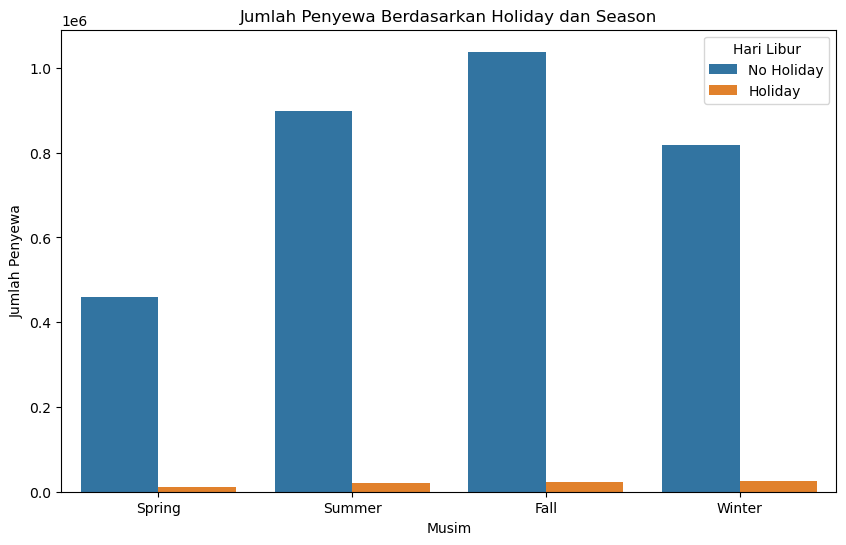

In [151]:
# Visualisasi Jumlah Penyewa Berdasarkan Holiday dan Season
plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_season_counts, x='season', y='cnt', hue='holiday')
plt.title('Jumlah Penyewa Berdasarkan Holiday dan Season')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Hari Libur')
plt.show()


**Dari hasil visualsisasi diatas dapat dilihat bahwa :**

1. Musim Fall (Gugur) merupakan musim dengan jumlah penyewa tertinggi baik pada hari libur maupun bukan libur. Ini mengindikasikan bahwa cuaca atau aktivitas pada musim gugur mungkin lebih mendukung aktivitas bersepeda.
2. Jumlah penyewa secara umum lebih tinggi pada hari-hari yang bukan libur. Ini masuk akal karena pada hari kerja, orang-orang mungkin lebih sering menggunakan sepeda untuk beraktivitas sehari-hari seperti bekerja atau bersekolah.
3. Pada semua musim, jumlah penyewa pada hari libur lebih rendah dibandingkan hari yang bukan libur. Ini menunjukkan bahwa meskipun ada peningkatan jumlah penyewa pada hari libur, namun secara keseluruhan, aktivitas bersepeda lebih tinggi pada hari kerja.
4. Terdapat fluktuasi jumlah penyewa yang cukup signifikan antara musim. Ini mengindikasikan bahwa faktor musiman seperti cuaca, suhu, dan panjang hari memiliki pengaruh yang cukup besar terhadap minat masyarakat untuk menyewa sepeda.

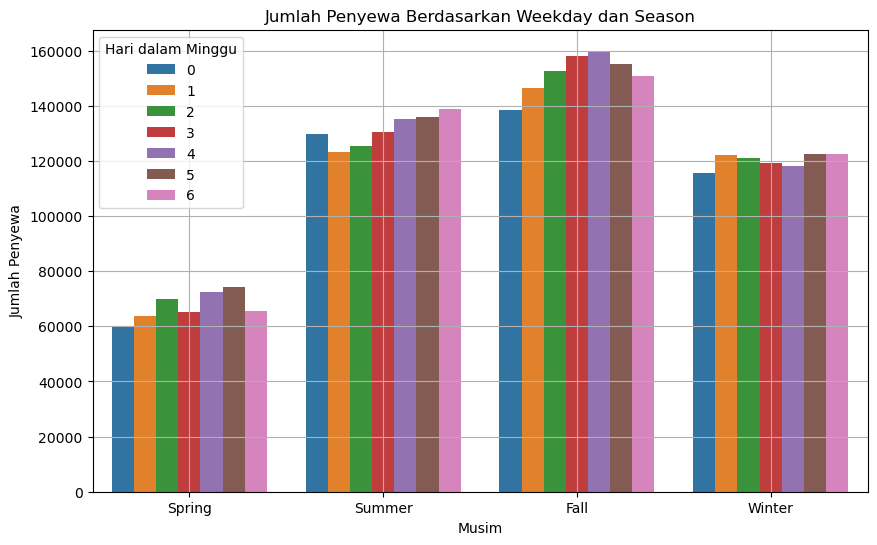

In [152]:
# Visualisasi Jumlah Penyewa Berdasarkan Weekday dan Season
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_season_counts, x='season', y='cnt', hue='weekday')
plt.title('Jumlah Penyewa Berdasarkan Weekday dan Season')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Hari dalam Minggu', loc='upper left')
plt.grid()
plt.show()

**Dari hasil visualisasi diatas dapat dilihat bahwa :**

1. Fluktuasi Musiman: Terdapat pola musiman yang jelas dalam jumlah penyewa. Musim Fall (Gugur) umumnya memiliki jumlah penyewa tertinggi, diikuti oleh Summer (Musim Panas). Musim Spring (Musim Semi) dan Winter (Musim Dingin) cenderung memiliki jumlah penyewa yang lebih rendah. Ini menunjukkan bahwa faktor cuaca dan aktivitas musiman sangat mempengaruhi minat masyarakat untuk menyewa sepeda.
2. Pola Harian:

 - Hari Kerja vs Akhir Pekan: Secara umum, jumlah penyewa pada hari kerja (Senin hingga Jumat) lebih tinggi dibandingkan akhir pekan (Sabtu dan Minggu). Ini mungkin karena banyak orang menggunakan sepeda sebagai alat transportasi untuk bekerja atau aktivitas sehari-hari lainnya.
 - Perbedaan Hari Kerja: Terdapat sedikit perbedaan jumlah penyewa di antara hari-hari kerja. Ini dipengaruhi oleh faktor-faktor seperti hari libur nasional, acara khusus, atau kondisi cuaca pada hari tersebut.

3. Interaksi Musim dan Hari: Kombinasi antara musim dan hari dalam seminggu memberikan pola yang lebih kompleks. Misalnya, pada musim panas, jumlah penyewa pada akhir pekan mungkin lebih tinggi dibandingkan musim dingin karena cuaca yang lebih mendukung untuk beraktivitas di luar ruangan.

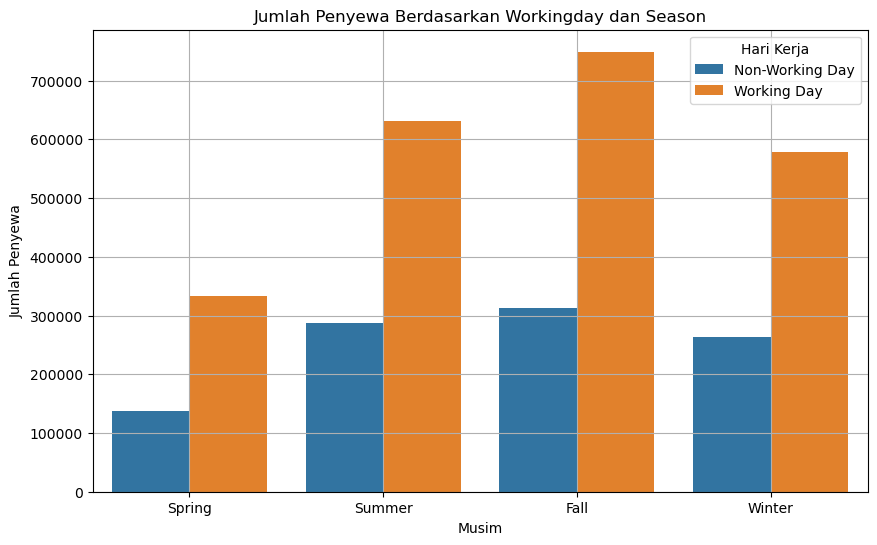

In [153]:
# Visualisasi Jumlah Penyewa Berdasarkan Workingday dan Season
plt.figure(figsize=(10, 6))
sns.barplot(data=workingday_season_counts, x='season', y='cnt', hue='workingday')
plt.title('Jumlah Penyewa Berdasarkan Workingday dan Season')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Hari Kerja')
plt.grid()
plt.show()

**Dari hasil visusalisasi diatas daapat dilihat bahwa :**

1.  Dominasi Hari Kerja: Secara umum, jumlah penyewa pada hari kerja lebih tinggi dibandingkan akhir pekan di semua musim. Ini mengindikasikan bahwa banyak orang menggunakan sepeda sebagai alat transportasi sehari-hari untuk bekerja atau aktivitas lainnya.
2. Fluktuasi Musiman: Terdapat pola musiman yang jelas dalam jumlah penyewa, baik pada hari kerja maupun akhir pekan. Musim gugur (Fall) umumnya memiliki jumlah penyewa tertinggi, diikuti oleh musim panas (Summer). Musim semi (Spring) dan musim dingin (Winter) cenderung memiliki jumlah penyewa yang lebih rendah. Ini menunjukkan bahwa faktor cuaca dan aktivitas musiman sangat mempengaruhi minat masyarakat untuk menyewa sepeda.
3. Interaksi Musim dan Hari Kerja: Kombinasi antara musim dan hari kerja memberikan pola yang lebih kompleks. Misalnya, pada musim panas, jumlah penyewa pada akhir pekan mungkin lebih tinggi dibandingkan musim dingin karena cuaca yang lebih mendukung untuk beraktivitas di luar ruangan.

# Visualisasi & Explanatory Pertanyaan 2

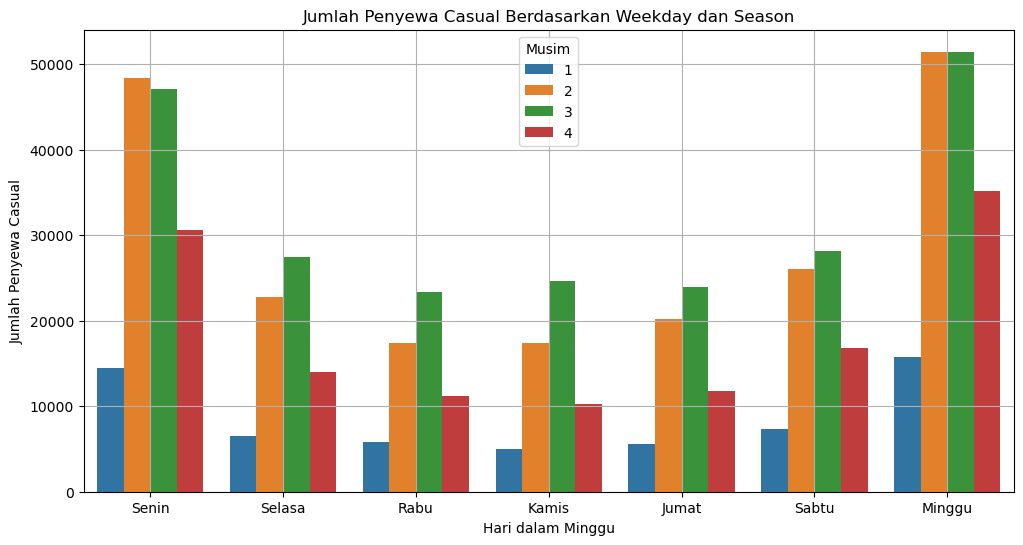

In [154]:
# 1. Visualisasi Casual Count berdasarkan Weekday dan Season
plt.figure(figsize=(12, 6))
sns.barplot(data=casual_weekday_season, x='weekday', y='casual', hue='season')
plt.title('Jumlah Penyewa Casual Berdasarkan Weekday dan Season')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Penyewa Casual')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.legend(title='Musim')
plt.grid()
plt.show()


**Dari hasil visualisasi diata dapat dilihat bahwa :**
1. Fluktuasi Harian: Jumlah penyewa kasual cenderung lebih tinggi pada akhir pekan (Sabtu dan Minggu) dibandingkan hari kerja. Ini menunjukkan bahwa banyak orang menggunakan sepeda kasual untuk rekreasi atau aktivitas di luar ruangan pada akhir pekan.
2. Pola Musiman: Terdapat perbedaan jumlah penyewa kasual di setiap musim, meskipun tidak sejelas pada visualisasi sebelumnya. Namun, secara umum, musim-musim tertentu mungkin memiliki preferensi yang berbeda terkait dengan penggunaan sepeda kasual.
3. Interaksi Hari dan Musim: Kombinasi antara hari dalam minggu dan musim memberikan pola yang lebih kompleks. Misalnya, pada musim panas, jumlah penyewa kasual pada akhir pekan mungkin lebih tinggi dibandingkan musim dingin karena cuaca yang lebih mendukung untuk beraktivitas di luar ruangan.

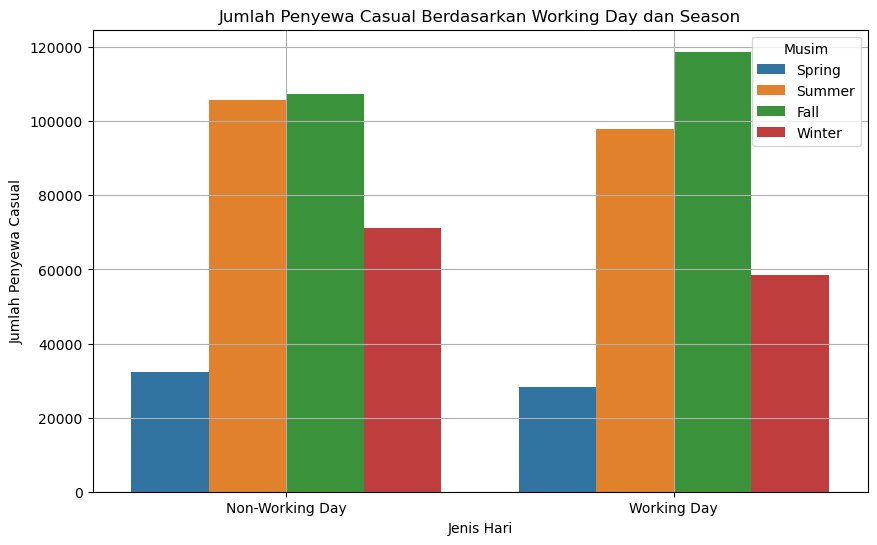

In [155]:
# 2. Visualisasi Casual Count berdasarkan Working Day dan Season
casual_workingday_season = day_df.groupby(['workingday', 'season'])['casual'].sum().reset_index()
casual_workingday_season['season'] = casual_workingday_season['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
casual_workingday_season['workingday'] = casual_workingday_season['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

plt.figure(figsize=(10, 6))
sns.barplot(data=casual_workingday_season, x='workingday', y='casual', hue='season')
plt.title('Jumlah Penyewa Casual Berdasarkan Working Day dan Season')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewa Casual')
plt.legend(title='Musim')
plt.grid()
plt.show()

**Dari hasil visualisasi diatas dapat dilihaat bahwa :**

1. Dominasi Hari Libur: Secara umum, jumlah penyewa kasual pada hari libur (non-working day) lebih tinggi dibandingkan hari kerja. Ini mengindikasikan bahwa banyak orang menggunakan sepeda kasual untuk rekreasi atau aktivitas di luar ruangan pada akhir pekan.

2. Fluktuasi Musiman: Terdapat perbedaan jumlah penyewa kasual di setiap musim. Musim gugur (fall) dan musim panas (summer) umumnya memiliki jumlah penyewa kasual yang lebih tinggi dibandingkan musim semi (spring) dan musim dingin (winter). Ini menunjukkan bahwa faktor cuaca dan aktivitas musiman sangat mempengaruhi minat masyarakat untuk menyewa sepeda kasual.

3. Interaksi Hari dan Musim: Kombinasi antara hari kerja dan musim memberikan pola yang lebih kompleks. Misalnya, pada musim panas, jumlah penyewa kasual pada akhir pekan mungkin lebih tinggi dibandingkan musim dingin karena cuaca yang lebih mendukung untuk beraktivitas di luar ruangan.

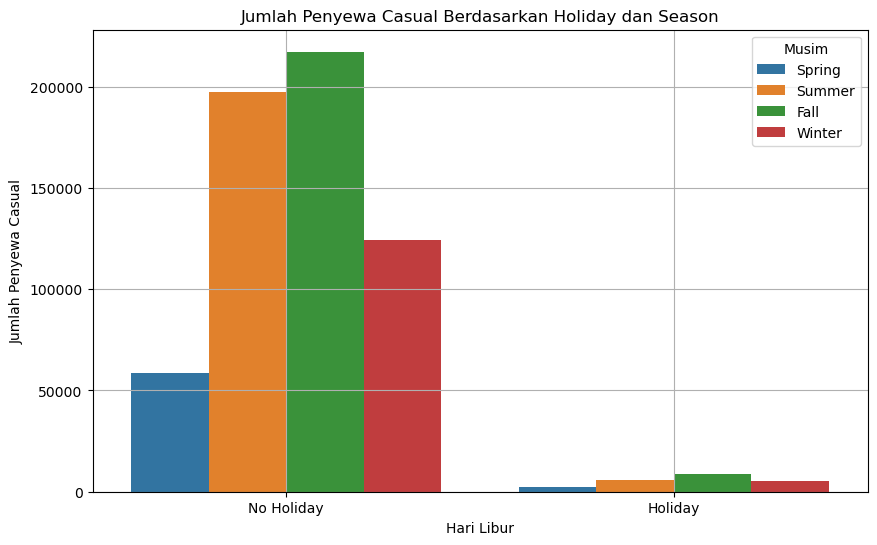

In [156]:
# 3. Visualisasi Casual Count berdasarkan Holiday dan Season
casual_holiday_season = day_df.groupby(['holiday', 'season'])['casual'].sum().reset_index()
casual_holiday_season['season'] = casual_holiday_season['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
casual_holiday_season['holiday'] = casual_holiday_season['holiday'].map({0: 'No Holiday', 1: 'Holiday'})

plt.figure(figsize=(10, 6))
sns.barplot(data=casual_holiday_season, x='holiday', y='casual', hue='season')
plt.title('Jumlah Penyewa Casual Berdasarkan Holiday dan Season')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewa Casual')
plt.legend(title='Musim')
plt.grid()
plt.show()

**Dari hasil visualisasi diatas dapat dilihaat bahwa :**

1. Dominasi Hari Libur: Secara umum, jumlah penyewa kasual pada hari libur (Holiday) lebih tinggi dibandingkan hari kerja (No Holiday). Ini mengindikasikan bahwa banyak orang menggunakan sepeda kasual untuk rekreasi atau aktivitas di luar ruangan pada akhir pekan atau hari libur.

2. Fluktuasi Musiman: Terdapat perbedaan jumlah penyewa kasual di setiap musim. Musim gugur (Fall) dan musim panas (Summer) umumnya memiliki jumlah penyewa kasual yang lebih tinggi dibandingkan musim semi (Spring) dan musim dingin (Winter). Ini menunjukkan bahwa faktor cuaca dan aktivitas musiman sangat mempengaruhi minat masyarakat untuk menyewa sepeda kasual.

3. Interaksi Hari Libur dan Musim: Kombinasi antara hari libur dan musim memberikan pola yang lebih kompleks. Misalnya, pada musim panas, jumlah penyewa kasual pada hari libur mungkin lebih tinggi dibandingkan musim dingin karena cuaca yang lebih mendukung untuk beraktivitas di luar ruangan.

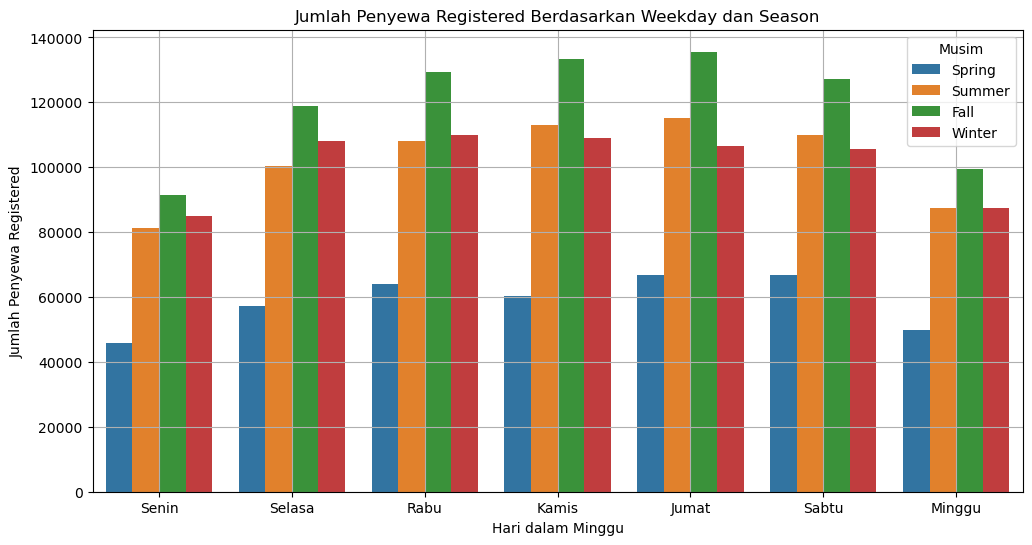

In [157]:
# 4. Registered Count berdasarkan Weekday dan Season
registered_weekday_season = day_df.groupby(['weekday', 'season'])['registered'].sum().reset_index()
registered_weekday_season['season'] = registered_weekday_season['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

plt.figure(figsize=(12, 6))
sns.barplot(data=registered_weekday_season, x='weekday', y='registered', hue='season')
plt.title('Jumlah Penyewa Registered Berdasarkan Weekday dan Season')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Penyewa Registered')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.legend(title='Musim')
plt.grid()
plt.show()

**Dari hasil visualisasi diatas dapat dilihat bahwa :**

1. Fluktuasi Harian: Jumlah penyewa registered cenderung lebih tinggi pada akhir pekan (Sabtu dan Minggu) dibandingkan hari kerja. Ini mengindikasikan bahwa banyak pengguna terdaftar menggunakan sepeda untuk rekreasi atau aktivitas di luar ruangan pada akhir pekan.
2. Pola Musiman: Terdapat perbedaan jumlah penyewa registered di setiap musim. Musim gugur (Fall) dan musim panas (Summer) umumnya memiliki jumlah penyewa registered yang lebih tinggi dibandingkan musim semi (Spring) dan musim dingin (Winter). Ini menunjukkan bahwa faktor cuaca dan aktivitas musiman sangat mempengaruhi minat masyarakat untuk menyewa sepeda.
3. Interaksi Hari dan Musim: Kombinasi antara hari dalam minggu dan musim memberikan pola yang lebih kompleks. Misalnya, pada musim panas, jumlah penyewa registered pada akhir pekan mungkin lebih tinggi dibandingkan musim dingin karena cuaca yang lebih mendukung untuk beraktivitas di luar ruangan.

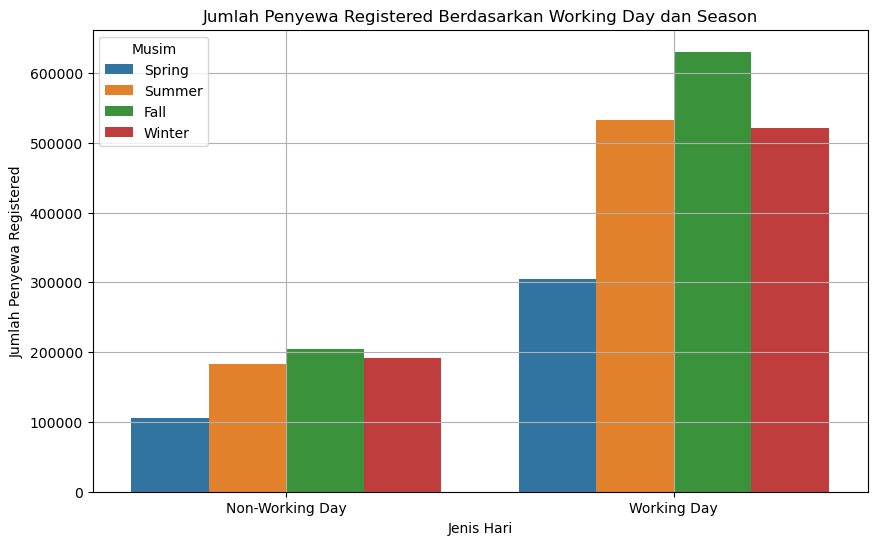

In [158]:
# 5. Registered Count berdasarkan Working Day dan Season
registered_workingday_season = day_df.groupby(['workingday', 'season'])['registered'].sum().reset_index()
registered_workingday_season['season'] = registered_workingday_season['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
registered_workingday_season['workingday'] = registered_workingday_season['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

plt.figure(figsize=(10, 6))
sns.barplot(data=registered_workingday_season, x='workingday', y='registered', hue='season')
plt.title('Jumlah Penyewa Registered Berdasarkan Working Day dan Season')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewa Registered')
plt.legend(title='Musim')
plt.grid()
plt.show()

**Dari hasil viasualisai diatas dapat diligat bahwa :**

1. Dominasi Hari Libur: Secara umum, jumlah penyewa registered pada hari libur (non-working day) lebih tinggi dibandingkan hari kerja. Ini mengindikasikan bahwa banyak pengguna terdaftar menggunakan sepeda untuk rekreasi atau aktivitas di luar ruangan pada akhir pekan.

2. Fluktuasi Musiman: Terdapat perbedaan jumlah penyewa registered di setiap musim. Musim gugur (fall) dan musim panas (summer) umumnya memiliki jumlah penyewa registered yang lebih tinggi dibandingkan musim semi (spring) dan musim dingin (winter). Ini menunjukkan bahwa faktor cuaca dan aktivitas musiman sangat mempengaruhi minat masyarakat untuk menyewa sepeda.

3. Interaksi Hari dan Musim: Kombinasi antara hari kerja dan musim memberikan pola yang lebih kompleks. Misalnya, pada musim panas, jumlah penyewa registered pada akhir pekan mungkin lebih tinggi dibandingkan musim dingin karena cuaca yang lebih mendukung untuk beraktivitas di luar ruangan.

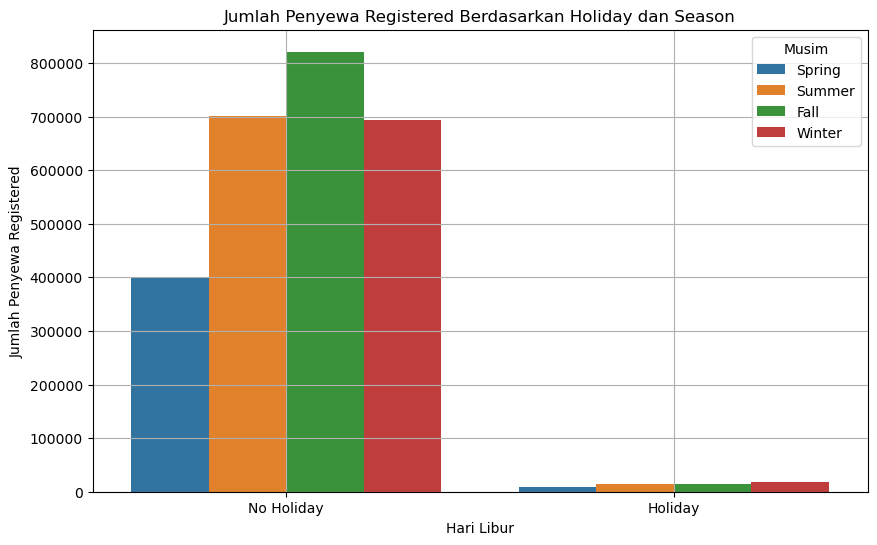

In [159]:
# 6. Registered Count berdasarkan Holiday dan Season
registered_holiday_season = day_df.groupby(['holiday', 'season'])['registered'].sum().reset_index()
registered_holiday_season['season'] = registered_holiday_season['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
registered_holiday_season['holiday'] = registered_holiday_season['holiday'].map({0: 'No Holiday', 1: 'Holiday'})

plt.figure(figsize=(10, 6))
sns.barplot(data=registered_holiday_season, x='holiday', y='registered', hue='season')
plt.title('Jumlah Penyewa Registered Berdasarkan Holiday dan Season')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewa Registered')
plt.legend(title='Musim')
plt.grid()
plt.show()

**Dari hasil visualisasi diatas dapat dilihat bahwa :**

1. Dominasi Hari Libur: Secara umum, jumlah penyewa registered pada hari libur (Holiday) jauh lebih tinggi dibandingkan hari kerja (No Holiday). Ini mengindikasikan bahwa banyak pengguna terdaftar menggunakan sepeda untuk rekreasi atau aktivitas di luar ruangan pada akhir pekan atau hari libur.

2. Fluktuasi Musiman: Terdapat perbedaan jumlah penyewa registered di setiap musim. Musim gugur (Fall) dan musim panas (Summer) umumnya memiliki jumlah penyewa registered yang lebih tinggi dibandingkan musim semi (Spring) dan musim dingin (Winter). Ini menunjukkan bahwa faktor cuaca dan aktivitas musiman sangat mempengaruhi minat masyarakat untuk menyewa sepeda.

3. Interaksi Hari Libur dan Musim: Kombinasi antara hari libur dan musim memberikan pola yang lebih kompleks. Misalnya, pada musim panas, jumlah penyewa registered pada hari libur mungkin lebih tinggi dibandingkan musim dingin karena cuaca yang lebih mendukung untuk beraktivitas di luar ruangan.

# Exploratory lanjutan

In [160]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1. Pengaruh Season terhadap Penyewaan Sepeda

In [161]:
# Filter relevant columns for clustering
season_data = day_df[['season', 'cnt', 'temp', 'hum']]

In [162]:
# Normalize the data
scaler = StandardScaler()
season_scaled = scaler.fit_transform(season_data)

In [163]:
# Apply KMeans clustering
kmeans_season = KMeans(n_clusters=4, random_state=42)  # Using 4 clusters for seasons
season_data['cluster'] = kmeans_season.fit_predict(season_scaled)

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_46669/920892009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['cluster'] = kmeans_season.fit_predict(season_scaled)


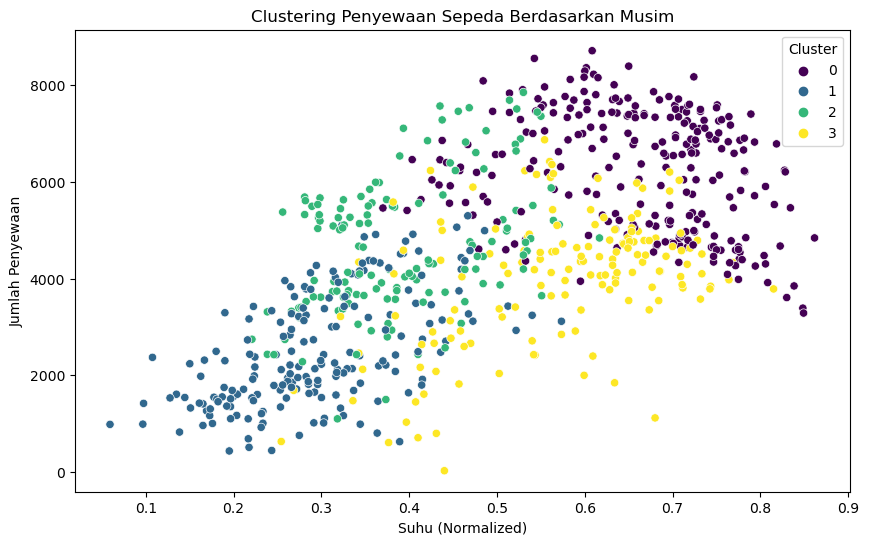

In [164]:
# Visualize the clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=season_data, x='temp', y='cnt', hue='cluster', palette='viridis')
plt.title('Clustering Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Cluster')
plt.show()

### Berdasarkan visualisasi, kita dapat menarik insight :

* Segmentasi Pasar:
  - Musim Puncak: Terdapat cluster yang menunjukkan jumlah penyewaan yang sangat tinggi pada suhu tertentu. Ini mengindikasikan musim puncak dalam bisnis penyewaan sepeda. Perusahaan dapat mempersiapkan diri dengan meningkatkan jumlah sepeda yang tersedia dan mungkin menawarkan promo khusus selama musim puncak.
  - Musim Sepi: Sebaliknya, ada juga cluster yang menunjukkan jumlah penyewaan yang lebih rendah. Perusahaan dapat memanfaatkan periode ini untuk melakukan perawatan rutin pada sepeda atau menawarkan paket promosi khusus untuk menarik pelanggan.
* Strategi Harga:
  - Harga Dinamis: Perusahaan dapat menerapkan strategi harga yang dinamis berdasarkan musim dan suhu. Misalnya, menaikkan harga sewa selama musim puncak dan memberikan diskon pada musim sepi.
* Perencanaan Inventaris:
  - Prediksi Permintaan: Dengan memahami pola penyewaan pada setiap cluster, perusahaan dapat lebih akurat dalam memprediksi permintaan sepeda di masa mendatang dan mengatur inventaris secara lebih efisien.
  - Lokasi Stasiun Sepeda: Perusahaan dapat mengoptimalkan lokasi stasiun sepeda berdasarkan pola penggunaan pada setiap cluster. Misalnya, menempatkan lebih banyak sepeda di area yang populer selama musim puncak.
* Pengembangan Produk:
  - Aksesori Musim Dingin: Jika ada cluster yang menunjukkan penggunaan sepeda yang cukup tinggi meskipun pada suhu rendah, perusahaan dapat mempertimbangkan untuk menyediakan aksesori tambahan seperti sarung tangan, topi, atau jaket untuk menarik lebih banyak pelanggan.

## 2.Perilaku Penyewa Sepeda Casual dan Registered

In [174]:
# Filter relevant columns and split data for different conditions
# Select weekday data
behavior_data_weekday = day_df[day_df['weekday'] == 1][['casual', 'registered', 'cnt']]  

# Select working day data
behavior_data_workingday = day_df[day_df['workingday'] == 1][['casual', 'registered', 'cnt']] 

# Select holiday data
behavior_data_holiday = day_df[day_df['holiday'] == 1][['casual', 'registered', 'cnt']] 

In [175]:
# Normalize the data
behavior_scaled_1 = scaler.fit_transform(behavior_data_weekday)
behavior_scaled_2 = scaler.fit_transform(behavior_data_workingday)
behavior_scaled_3 = scaler.fit_transform(behavior_data_holiday)

In [176]:
# Apply KMeans clustering
kmeans_behavior = KMeans(n_clusters=2, random_state=42)  # Using 3 clusters for behavior
behavior_data_weekday['cluster'] = kmeans_behavior.fit_predict(behavior_scaled_1)

kmeans_behavior = KMeans(n_clusters=2, random_state=42)  # Using 3 clusters for behavior
behavior_data_workingday['cluster'] = kmeans_behavior.fit_predict(behavior_scaled_2)

kmeans_behavior = KMeans(n_clusters=2, random_state=42)  # Using 3 clusters for behavior
behavior_data_holiday['cluster'] = kmeans_behavior.fit_predict(behavior_scaled_3)

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


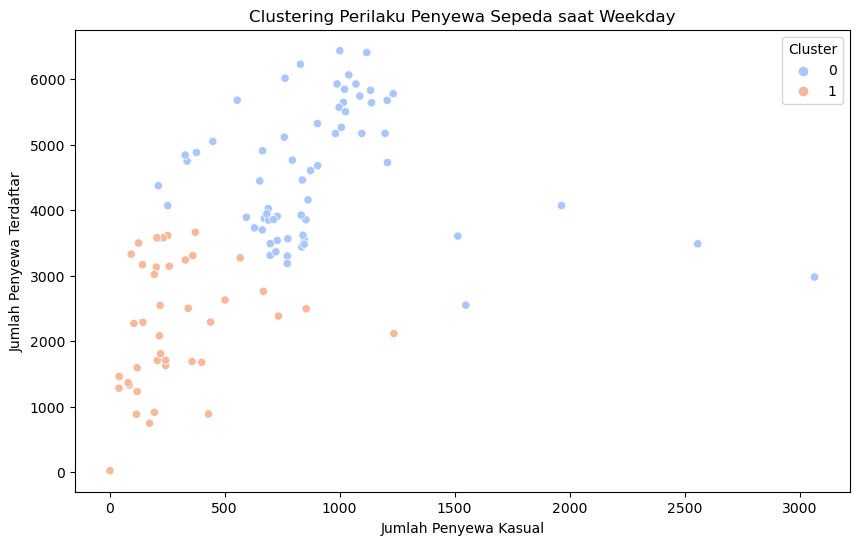

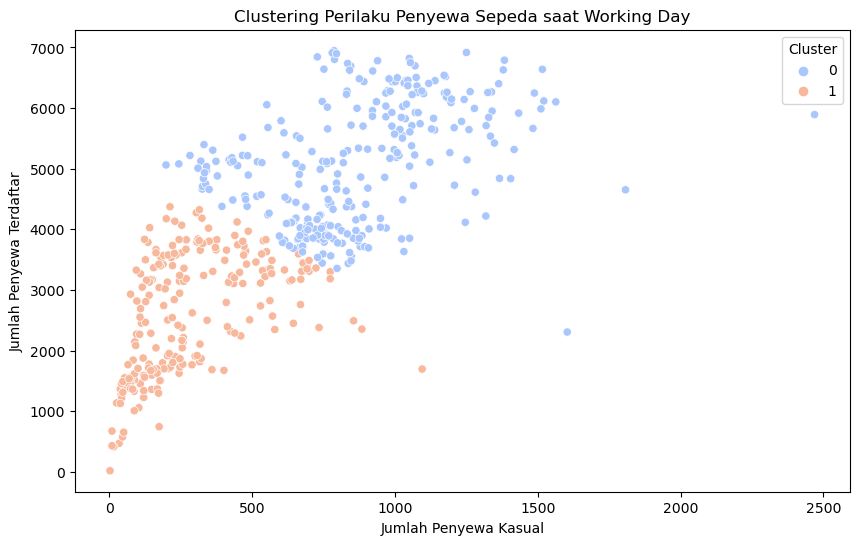

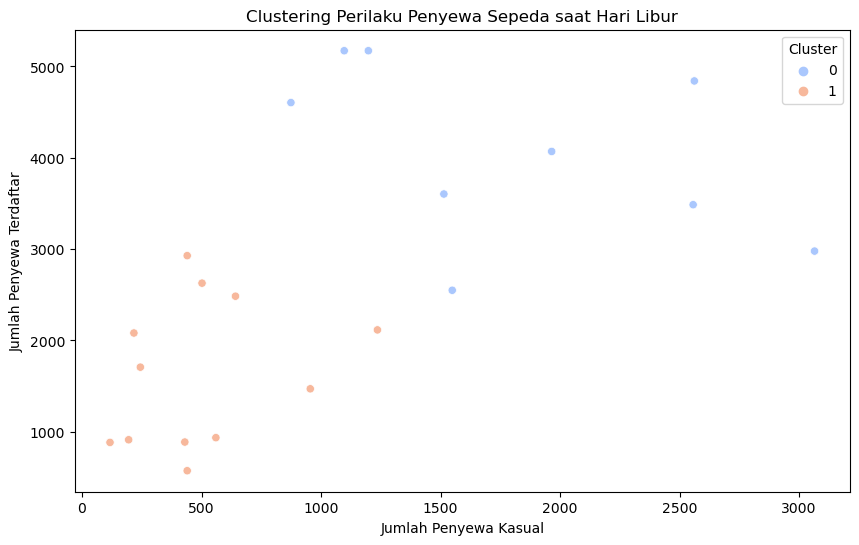

In [177]:
# Visualisasi 1: Clustering Penyewa Sepeda saat Weekday
plt.figure(figsize=(10, 6))
sns.scatterplot(data=behavior_data_weekday, x='casual', y='registered', hue='cluster', palette='coolwarm')
plt.title('Clustering Perilaku Penyewa Sepeda saat Weekday')
plt.xlabel('Jumlah Penyewa Kasual')
plt.ylabel('Jumlah Penyewa Terdaftar')
plt.legend(title='Cluster')
plt.show()

# Visualisasi 2: Clustering Penyewa Sepeda saat Working Day
plt.figure(figsize=(10, 6))
sns.scatterplot(data=behavior_data_workingday, x='casual', y='registered', hue='cluster', palette='coolwarm')
plt.title('Clustering Perilaku Penyewa Sepeda saat Working Day')
plt.xlabel('Jumlah Penyewa Kasual')
plt.ylabel('Jumlah Penyewa Terdaftar')
plt.legend(title='Cluster')
plt.show()

# Visualisasi 3: Clustering Penyewa Sepeda saat Holiday
plt.figure(figsize=(10, 6))
sns.scatterplot(data=behavior_data_holiday, x='casual', y='registered', hue='cluster', palette='coolwarm')
plt.title('Clustering Perilaku Penyewa Sepeda saat Hari Libur')
plt.xlabel('Jumlah Penyewa Kasual')
plt.ylabel('Jumlah Penyewa Terdaftar')
plt.legend(title='Cluster')
plt.show()

### Weekday:
* Cluster pertama cenderung memiliki jumlah penyewa reguler dan casual yang lebih tinggi.
* Cluster kedua memiliki jumlah penyewaan yang lebih rendah.

### Workingday:
* Pola serupa dengan weekday, namun dengan jumlah penyewaan reguler yang lebih tinggi. Ini menunjukkan bahwa pada hari kerja, sebagian besar pengguna adalah pengguna reguler yang mungkin menggunakan sepeda untuk commuting.

### Holiday :
* Jumlah penyewa casual cenderung lebih tinggi dibandingkan hari kerja, menunjukkan bahwa banyak orang menyewa sepeda untuk rekreasi pada hari libur.
* Ada kemungkinan adanya beberapa cluster yang mewakili area wisata atau taman yang populer.

# Kesimpulan

## Kesimpulan dari pertanyaan 1
### Bagaimana pengaruh musim terhadap penyewaan sepeda dan bagaimana cara memaksimalkan pendapatan di setiap musim?

1. Puncak Musim:
  - Musim Gugur dan Musim Panas: Kedua musim ini secara konsisten menunjukkan jumlah penyewaan tertinggi, baik pada hari kerja maupun hari libur. Ini mengindikasikan bahwa cuaca yang cerah dan aktivitas luar ruangan yang meningkat pada musim-musim ini menjadi daya tarik bagi masyarakat untuk menyewa sepeda.
  - Musim Semi dan Musim Dingin: Jumlah penyewaan cenderung lebih rendah pada kedua musim ini, terutama dipengaruhi oleh cuaca yang kurang mendukung untuk bersepeda.

2. Pengaruh Hari Kerja dan Hari Libur:

  - Hari Libur: Baik pada musim puncak maupun rendah, jumlah penyewaan selalu lebih tinggi pada hari libur. Ini menunjukkan bahwa banyak orang memanfaatkan waktu luang mereka untuk bersepeda.
  - Hari Kerja: Meskipun lebih rendah dibandingkan hari libur, jumlah penyewaan pada hari kerja tetap signifikan, terutama pada musim-musim puncak.

3. Perbedaan Antar Musim:
  - Fluktuasi jumlah penyewaan antar musim cukup signifikan. Ini menunjukkan bahwa perusahaan perlu memiliki strategi yang berbeda untuk setiap musim agar dapat memaksimalkan pendapatan.

**Berdasarkan analisis di atas, berikut adalah beberapa rekomendasi yang dapat diterapkan oleh perusahaan untuk meningkatkan pendapatan di setiap musim:**

1. Musim Puncak (Gugur dan Panas)
  - Meningkatkan Kapasitas: Pastikan ketersediaan sepeda dan stasiun sewa mencukupi untuk memenuhi permintaan yang tinggi.
  - Promosi Intensif: Meluncurkan kampanye promosi menarik, seperti diskon, paket bundling, atau event bersepeda, untuk menarik lebih banyak pelanggan.
  - Kerjasama dengan Bisnis Lokal: Berkolaborasi dengan bisnis lokal seperti kafe, restoran, atau tempat wisata untuk menawarkan paket bundling atau diskon khusus bagi pelanggan yang menyewa sepeda.
  - Perluas Jangkauan: Memperluas area layanan atau membuka stasiun sewa baru di lokasi-lokasi strategis yang ramai pengunjung.
  - Perawatan Sepeda: Pastikan sepeda selalu dalam kondisi prima untuk memberikan pengalaman bersepeda yang menyenangkan bagi pelanggan.

2. Musim Rendah (Semi dan Dingin)

  - Promosi Musim Dingin: Menawarkan promo khusus seperti sewa bulanan atau tahunan dengan harga diskon untuk menarik pelanggan tetap.
  - Paket Bundling dengan Aktivitas Lain: Menggabungkan penyewaan sepeda dengan aktivitas musim dingin lainnya, seperti mengunjungi pasar Natal atau menikmati pemandangan musim dingin.
  - Peralatan Tambahan: Menyediakan peralatan tambahan seperti sarung tangan, topi, atau jaket untuk membuat pengalaman bersepeda di musim dingin lebih nyaman.
  - Event Khusus: Mengadakan event bersepeda indoor atau bertema musim dingin untuk menarik minat pelanggan.
  - Berdasarkan analisis di atas, berikut adalah beberapa rekomendasi yang dapat diterapkan oleh perusahaan untuk meningkatkan pendapatan di setiap musim:
3. Musim Puncak (Gugur dan Panas)

  - Meningkatkan Kapasitas: Pastikan ketersediaan sepeda dan stasiun sewa mencukupi untuk memenuhi permintaan yang tinggi.
  - Promosi Intensif: Meluncurkan kampanye promosi menarik, seperti diskon, paket bundling, atau event bersepeda, untuk menarik lebih banyak pelanggan.
  - Kerjasama dengan Bisnis Lokal: Berkolaborasi dengan bisnis lokal seperti kafe, restoran, atau tempat wisata untuk menawarkan paket bundling atau diskon khusus bagi pelanggan yang menyewa sepeda.
  - Perluas Jangkauan: Memperluas area layanan atau membuka stasiun sewa baru di lokasi-lokasi strategis yang ramai pengunjung.
  - Perawatan Sepeda: Pastikan sepeda selalu dalam kondisi prima untuk memberikan pengalaman bersepeda yang menyenangkan bagi pelanggan.

4. Musim Rendah (Semi dan Dingin)

  - Promosi Musim Dingin: Menawarkan promo khusus seperti sewa bulanan atau tahunan dengan harga diskon untuk menarik pelanggan tetap.
  - Paket Bundling dengan Aktivitas Lain: Menggabungkan penyewaan sepeda dengan aktivitas musim dingin lainnya, seperti mengunjungi pasar Natal atau menikmati pemandangan musim dingin.
  - Peralatan Tambahan: Menyediakan peralatan tambahan seperti sarung tangan, topi, atau jaket untuk membuat pengalaman bersepeda di musim dingin lebih nyaman.
  - Event Khusus: Mengadakan event bersepeda indoor atau bertema musim dingin untuk menarik minat pelanggan.
  - Promosi untuk Pelanggan Setia: Memberikan reward atau diskon khusus bagi pelanggan setia sebagai bentuk apresiasi.

## Kesimpulan dari Pertanyaan 2
### Bagaimana perilaku penyewaan pengguna kasual dibandingkan dengan pengguna terdaftar dan bagaimana cara mengonversi pengguna kasual menjadi pelanggan tetap?

Berdasarkan visualisasi, kita dapat mengidentifikasi beberapa perbedaan pola penggunaan yang signifikan:
1. Frekuensi Penggunaan

  - Pengguna Terdaftar: Umumnya menunjukkan frekuensi penggunaan yang lebih tinggi dan lebih konsisten sepanjang tahun, terutama pada hari kerja. Ini mengindikasikan bahwa mereka telah menjadikan layanan penyewaan sepeda sebagai bagian dari rutinitas sehari-hari mereka, misalnya untuk komuter atau aktivitas fisik rutin.
  - Pengguna Kasual: Pola penggunaannya lebih fluktuatif, dengan peningkatan signifikan pada akhir pekan dan hari libur. Ini menunjukkan bahwa mereka lebih cenderung menggunakan sepeda untuk rekreasi atau aktivitas spontan.

2. Pengaruh Musim

  - Keduanya: Baik pengguna terdaftar maupun kasual menunjukkan peningkatan jumlah penyewaan pada musim gugur dan musim panas. Ini menunjukkan bahwa cuaca yang mendukung menjadi faktor utama yang mempengaruhi keputusan untuk menyewa sepeda.
  - Perbedaan Respon: Pengguna terdaftar mungkin lebih konsisten dalam menggunakan sepeda sepanjang tahun, meskipun pada musim dingin, sementara pengguna kasual cenderung lebih sensitif Anda berikan untuk pengguna terdaftar dan kasualterhadap perubahan cuaca.

3. Pengaruh Hari Kerja dan Hari Libur

  - Pengguna Terdaftar: Jumlah penyewaan pengguna terdaftar cenderung lebih stabil sepanjang minggu, meskipun tetap ada peningkatan pada akhir pekan. Ini menunjukkan bahwa mereka menggunakan sepeda baik untuk keperluan pribadi maupun profesional.
  - Pengguna Kasual: Seperti yang telah disebutkan sebelumnya, pengguna kasual menunjukkan peningkatan signifikan pada akhir pekan dan hari libur.
Strategi Konversi yang Lebih Spesifik

**Berdasarkan pemahaman akan perbedaan ini, berikut adalah beberapa strategi yang lebih spesifik untuk mengkonversi pengguna kasual menjadi pelanggan tetap:**

1. Program Loyalitas yang Lebih Personal:
      - Rekomendasi Rute: Berdasarkan riwayat penyewaan, berikan rekomendasi rute menarik yang dapat mereka coba secara berkala.
      - Tantangan Bersepeda: Buat tantangan bersepeda mingguan atau bulanan dengan hadiah menarik untuk mendorong pengguna terus aktif.
2. Promosi Berbasis Waktu:
      - Diskon Tengah Minggu: Tawarkan diskon khusus pada hari kerja untuk mendorong pengguna kasual mencoba layanan ini untuk aktivitas sehari-hari.
      - Paket Bulanan: Promosikan paket bulanan dengan harga yang menarik untuk pengguna yang sering menyewa pada akhir pekan.
3. Kerjasama dengan Mitra Lokal:
      - Kemitraan dengan Gym atau Studio Fitness: Tawarkan diskon khusus bagi anggota gym atau studio fitness yang ingin mencoba bersepeda.
      - Kemitraan dengan Toko Sepeda: Berikan diskon untuk pembelian aksesori sepeda bagi pelanggan setia.
4. Pendidikan dan Kesadaran:
      - Kampanye Keselamatan: Edukasi pengguna tentang pentingnya keselamatan bersepeda dan berikan tips-tips berkendara yang aman.
      - Manfaat Kesehatan: Tekankan manfaat kesehatan dari bersepeda secara teratur.


### **Masih sangat memungkinkan unutk mengeksplorasi lebih jauh terhadap data yang telah ada dengan lebih mendalam, semoga edepan lebih bisa lagi unutk mengeksploarsi data dengan lebih mendalam dan mendapatkan insight bermanfaat lainnya**

# Terimakasih

#Buat Dashboard Sederhana

In [ ]:
day_df.to_csv("all_data.csv", index=False)